In [12]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [4]:
def gamma(t):
    return np.exp(t) * np.cos(t), np.exp(t) * np.sin(t)

In [5]:
def gamma_prime(t):
    return np.exp(t)*np.cos(t) - np.exp(t)*np.sin(t), np.exp(t)*np.sin(t) + np.exp(t)*np.cos(t)

In [6]:
t = np.linspace(0,10,1000)

In [7]:
X, Y = gamma(t)
dx, dy = gamma_prime(t)

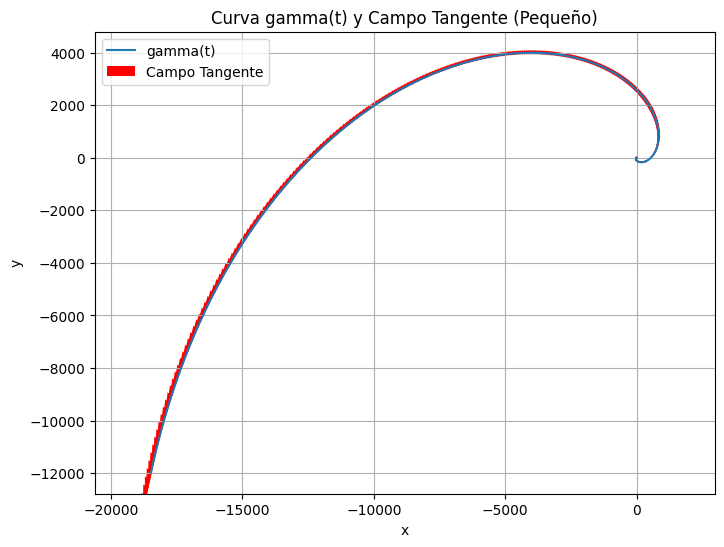

In [8]:
scale = .1
dx_scaled = dx * scale
dy_scaled = dy * scale

plt.figure(figsize=(8, 6))
plt.plot(X, Y, label='gamma(t)')

plt.quiver(X, Y, dx_scaled, dy_scaled, angles='xy', scale_units='xy', scale=1, color='r', label='Campo Tangente')

plt.title('Curva gamma(t) y Campo Tangente (Pequeño)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.axis('equal')

plt.show()

$\gamma_\hat(s) = \left(\exp\left(\ln\left(\frac{s}{\sqrt{2}} + 1\right)\right) \cdot \cos\left(\ln\left(\frac{s}{\sqrt{2}} + 1\right)\right), \exp\left(\ln\left(\frac{s}{\sqrt{2}} + 1\right)\right) \cdot \sin\left(\ln\left(\frac{s}{\sqrt{2}} + 1\right)\right)\right)
$

In [9]:
def reparametrization(s):
    return (s / np.sqrt(2)) + 1

# Función gamma_hat
def gamma_hat(s):
    reparam = reparametrization(s)
    x = np.exp(np.log(reparam) * np.cos(np.log(reparam)))
    y = np.exp(np.log(reparam) * np.sin(np.log(reparam)))
    return x, y

In [10]:
s = np.linspace(0, 5, 1000)
X, Y = gamma_hat(s)

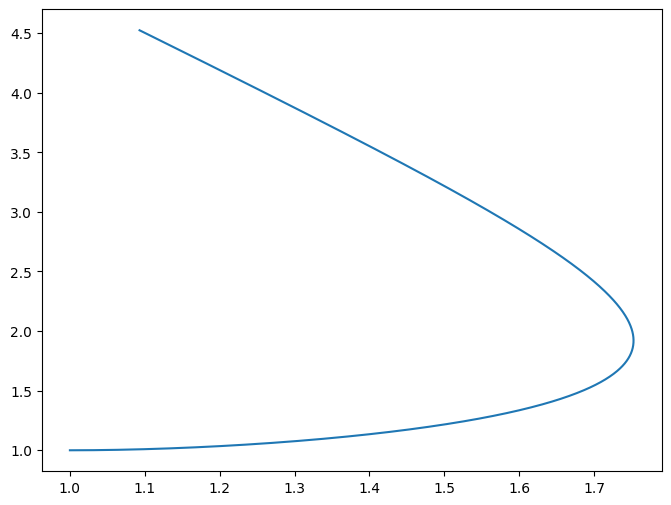

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(X, Y, label='gamma(t)')


### Ejercicio 37

Dada la curva

$\gamma(s) = (a * cos(wt), a * sen(wt), hwt)$

Con:
$h=0.7, w = 1, a = 3, t \in [0,15]$

Hallar los componentes del triedro de frenet-serret {$T,N,B$} y graficar

In [14]:
# Parámetros
h = 0.7
w = 1
a = 3
t = np.linspace(0, 15, 500)

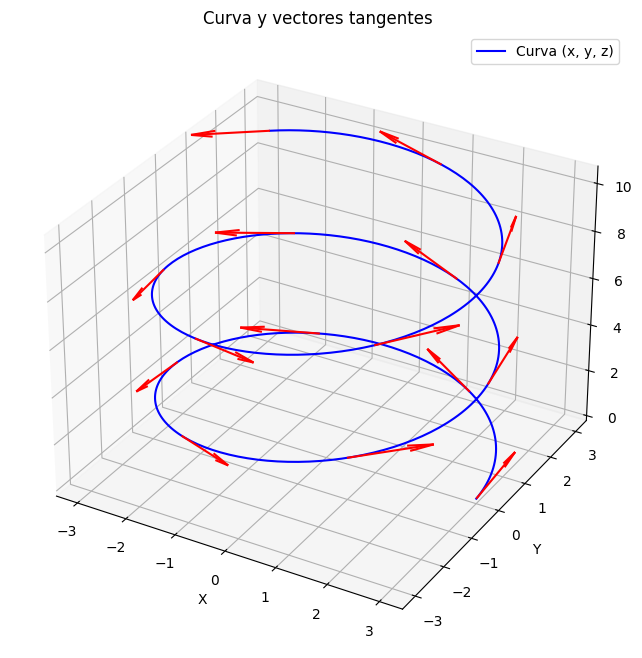

In [13]:
x = a * np.cos(w * t)
y = a * np.sin(w * t)
z = h * w * t

# Derivadas para el vector tangente T
dx = -a * w * np.sin(w * t)
dy = a * w * np.cos(w * t)
dz = h * w

# Selección de puntos para dibujar vectores tangentes
indices = np.linspace(0, len(t) - 1, 15, dtype=int)

# Graficar la curva y los vectores tangentes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar la curva
ax.plot(x, y, z, label="Curva (x, y, z)", color="blue")

# Graficar los vectores tangentes
for idx in indices:
    ax.quiver(
        x[idx], y[idx], z[idx],  # Origen del vector
        dx[idx], dy[idx], dz,  # Componentes del vector tangente
        color="red", length=1.5, normalize=True
    )

# Etiquetas y leyenda
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Curva y vectores tangentes")
ax.legend()
plt.show()